# Linear Regression

Data is from https://www.kaggle.com/mohansacharya/graduate-admissions

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
sns.set()

In [14]:
# load data
df = pd.read_csv("./data/Admission_Predict.csv")
df = df.drop(['Serial No.'], axis = 1)
df.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [15]:
# define function to train the model
def train_model(X, Y):
    reg = linear_model.LinearRegression()
    reg.fit(X, Y)
    return reg

In [16]:
# define function to test the model
def test_model(reg, X_test, Y_test):
    # predict
    Y_pred = reg.predict(X_test)

    # measure performance
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    
    r2 = r2_score(Y_test, Y_pred)
    print('RMSE: %f' % mse)
    print('r2:   %f' % r2)

In [17]:
# split data
train,test = train_test_split(df, test_size=0.2)

In [18]:
# Train model without scaling
X = train[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
Y = train[['Chance of Admit ']]
reg = train_model(X, Y)

In [19]:
# test model without scaling
X_test = test[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
Y_test = test[['Chance of Admit ']]

test_model(reg, X_test, Y_test)

RMSE: 0.004481
r2:   0.786817


In [20]:
# define function to scale data
def scale_data(dataframe):
    scaler = MinMaxScaler()
    dataframe['scaled_gre'] = scaler.fit_transform(dataframe['GRE Score'].values.reshape(-1,1))
    dataframe['scaled_toefl'] = scaler.fit_transform(dataframe['TOEFL Score'].values.reshape(-1,1))
    return dataframe

In [21]:
# scale data
df = scale_data(df)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,scaled_gre,scaled_toefl
0,337,118,4,4.5,4.5,9.65,1,0.92,0.94,0.928571
1,324,107,4,4.0,4.5,8.87,1,0.76,0.68,0.535714
2,316,104,3,3.0,3.5,8.00,1,0.72,0.52,0.428571
3,322,110,3,3.5,2.5,8.67,1,0.80,0.64,0.642857
4,314,103,2,2.0,3.0,8.21,0,0.65,0.48,0.392857


In [22]:
# split data
train,test = train_test_split(df, test_size=0.2)

In [23]:
# use scaled columns to train the model
X = train[['scaled_gre', 'scaled_toefl', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
Y = train[['Chance of Admit ']]
reg = train_model(X, Y)

In [24]:
# Predict on the test data
X_test = test[['scaled_gre', 'scaled_toefl', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
Y_test = test[['Chance of Admit ']]

test_model(reg, X_test, Y_test)

RMSE: 0.003121
r2:   0.805031


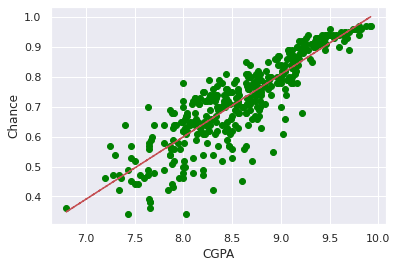

In [25]:
%matplotlib inline
x_label = "CGPA"
x = df[x_label]
y = df["Chance of Admit "]

# calculate trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.xlabel(x_label)
plt.ylabel("Chance")
plt.scatter(x, y, color="green")
plt.plot(x,p(x),"r--") 
